In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Official deaths daily']]
data.columns = ['ds', 'y']

In [4]:
data['floor'] = 0
data['cap'] = 50

# Modeling

### Model creation

In [5]:
model_args = {
    'changepoint_prior_scale': 0.95,
    'growth': 'logistic',
    'weekly_seasonality': 20,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [6]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
future = model.make_future_dataframe(periods = 1)
future['floor'] = 0
future['cap'] = 50

forecast = model.predict(future)

In [8]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
64,2020-06-09,19.0,15.451760,8.185556,22.469279
65,2020-06-10,23.0,15.761056,8.582304,23.523324
66,2020-06-11,9.0,11.636304,3.961747,18.917604
67,2020-06-12,7.0,11.676405,4.478127,19.223111
68,2020-06-13,15.0,10.156874,2.738396,16.890057
69,2020-06-14,10.0,6.037241,-1.059657,13.602885
70,2020-06-15,9.0,8.802096,1.102116,15.833953
71,2020-06-16,16.0,15.040757,7.834207,22.218364
72,2020-06-17,14.0,15.350671,7.939616,22.437157
73,2020-06-18,NaN,11.226542,3.651917,18.808556


### Model explanation

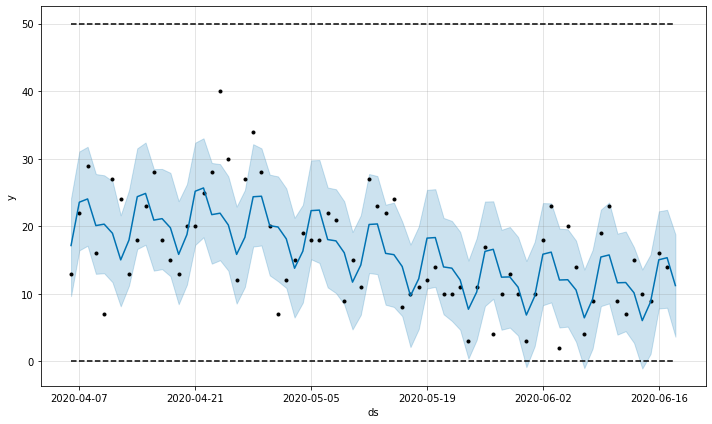

In [9]:
fig = model.plot(forecast)

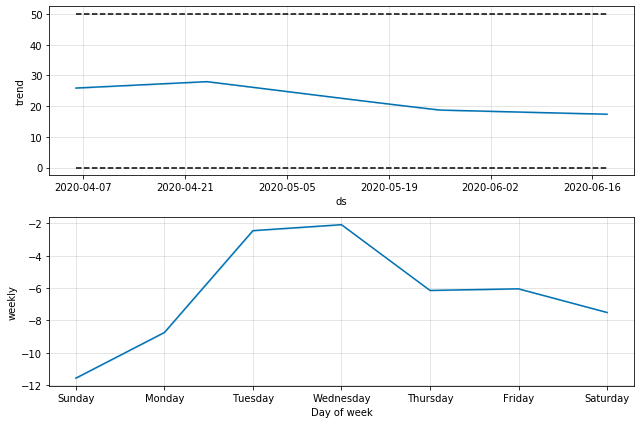

In [10]:
fig = model.plot_components(forecast)

### Model performance

In [11]:
results = cross_validation(model, initial = '60 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 12 forecasts with cutoffs between 2020-06-05 00:00:00 and 2020-06-16 00:00:00


In [12]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-06,6.863989,-0.833178,15.140107,14.0,2020-06-05
1,2020-06-07,3.911840,-3.798557,11.333511,4.0,2020-06-06
2,2020-06-08,6.792634,-0.861070,14.452858,9.0,2020-06-07
3,2020-06-09,12.514679,5.322450,20.102398,19.0,2020-06-08
4,2020-06-10,12.917575,5.197950,20.412920,23.0,2020-06-09
5,2020-06-11,10.195622,2.478087,17.627076,9.0,2020-06-10
6,2020-06-12,10.279220,2.537947,17.895163,7.0,2020-06-11
7,2020-06-13,7.395941,0.005203,14.718376,15.0,2020-06-12
8,2020-06-14,3.673576,-3.786536,11.585772,10.0,2020-06-13
9,2020-06-15,8.774073,0.585814,16.403762,9.0,2020-06-14


In [13]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,26.116549,5.110435,3.943235,0.292122,0.293298,0.833333


### Tomorrow prediction

In [14]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

11